In [9]:
from evaluate_perplexity import perplexity

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
perp = perplexity('Anjoe/poetry-gpt2-large-no-hoel',text1='gpt2_training_only_hoelderlin.txt',text2='gpt2_training_gutenberg.txt')
perp.compare_perp_cnt()



  0%|          | 0/140954 [00:00<?, ?it/s]

Perplexity: 55.287559509277344
[('Furchtbarentscheidend', 2), (' segnete', 14), ('Furchtbarentscheidend', 2), (' Dominiksgesichtern', 1), (' moderten', 2), (' voranzutragen', 1), (' Blut', 1957), (' vorbereiteter', 1), (' der', 97197), (' und', 130466), (' und', 130466), (' Dominiksgesicht', 1), (' Suppenzeit', 2), (' ganz', 2671), (' Suppenzeit', 2), (' Gesänge', 96), (' Bilds', 5), (' Antiphile', 2), (' Antiphile', 2), (' und', 130466), (' satzten', 1), ('Zustürzend', 1), (' freundeloser', 1), (' Gesänge', 96), (' über', 4185), (' wehet', 62), (' Eviers', 3), (' deckt', 245), (' Eviers', 3), (' Hobon', 2), (' und', 130466), (' Eviers', 3), (' Vernichtungsstunde', 2), (' Vernichtungsstunde', 2), (' blieben', 119), (' diesem', 1110), (' syrischer', 2), (' hinauf', 534), (' Chiertraube', 1), (' und', 130466), (' in', 47704), (' syrischer', 2), (' Phoebus', 3), (' Ossian', 4), (' und', 130466), (' zu', 29633), (' Kelch', 213), (' Antiphilens', 2), (' mildert', 13), (' zu', 29633)]


In [4]:
perp_2 = perplexity('Anjoe/poetry-gpt2-large-no-hoel',text1='generated_poems.txt',text2='gpt2_training_gutenberg.txt')
perp_2.compare_perp_cnt()

  0%|          | 0/77795 [00:00<?, ?it/s]

Perplexity: 52.807003021240234
[(' wären', 242), (' Als', 13152), (' Nase', 129), (' die', 100234), (' und', 130466), (' Ich', 50211), (' wer', 4368), (' Christ', 214), (' in', 47704), (' sich', 24956), (' Ihr', 17262), (' Ich', 50211), (' Ich', 50211), (' Karl', 178), (' Der', 97197), (' alles', 3895), (' Ich', 50211), (' die', 100234), (' Ich', 50211), (' Ich', 50211), (' Es', 27303), (' turin', 5), (' Er', 29125), (' plänen', 9), (' Ich', 50211), (' der', 97197), (' quälen', 87), (' Ich', 50211), (' dann', 6525), (' der', 97197), (' eva', 30), (' die', 100234), (' Ich', 50211), (' Puzzleteile', 0), (' Was', 14085), ('Fromm', 490), (' aber', 5535), (' Der', 97197), (' und', 130466), (' Der', 97197), (' das', 41615), (' dir', 11024), (' Das', 41615), (' ich', 50211), (' Das', 41615), (' was', 14085), (' der', 97197), (' wollustvoll', 2), (' Gunhild', 6), (' der', 97197)]


In [5]:
def get_perplexities_vs_cnt(nlls_lst,max_cnt):
    perplexities_vs_cnt = []
    for min_word_cnt in range(max_cnt):
        nlls_high_cnt = []
        for idx, nll in enumerate(nlls_lst):
            if perp.cnt_lst[idx] > min_word_cnt:
                nlls_high_cnt.append(nll)

        perplexity_high_cnt = np.exp(sum(nlls_high_cnt)/len(nlls_high_cnt))
        perplexities_vs_cnt.append(perplexity_high_cnt)
    return perplexities_vs_cnt


In [19]:
max_cnt = 20
perp_vs_cnt_1 = get_perplexities_vs_cnt(perp.nlls_lst, max_cnt)
perp_vs_cnt_2 = get_perplexities_vs_cnt(perp_2.nlls_lst, max_cnt)

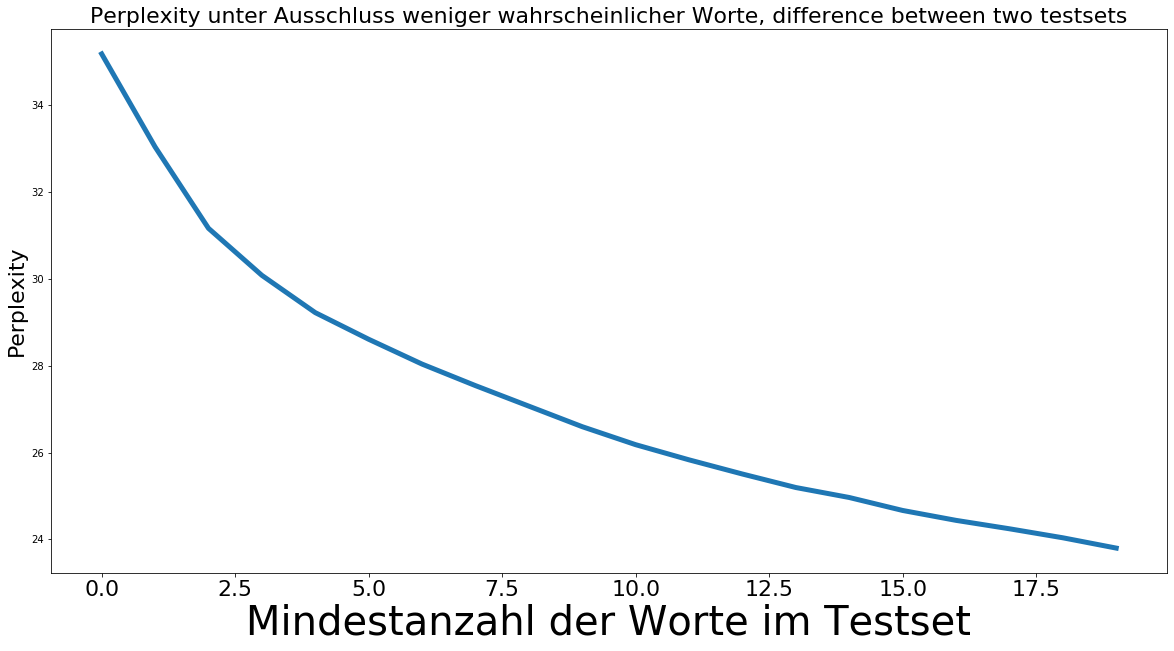

In [20]:

plt.figure(figsize = (20,10))

plt.rc('axes', titlesize=22)
plt.rc('axes', labelsize=22)
plt.rc('xtick', labelsize=22)
plt.xlabel('Mindestanzahl der Worte im Testset',fontsize=40)
plt.ylabel('Perplexity')
plt.title('Perplexity unter Ausschluss weniger wahrscheinlicher Worte, difference between two testsets')
plt.plot(np.arange(max_cnt), np.asarray(perp_vs_cnt_1)-np.asarray(perp_vs_cnt_2), linewidth=5)
# plt.plot(np.arange(max_cnt), , linewidth=5)
fig1 = plt.gcf()
plt.show()

fig1.savefig("data/perplexity/hoel_no_hoel_synth_perp_vs_cnt_diff_20.pdf", dpi=300)

In [63]:
result_df = pd.DataFrame(list(zip(perp.cnt_lst,perp.nlls_lst)),columns=['word_count','neg_log_like'])

result_df.to_pickle('data/perplexity/cnt_vs_nll_hoel_no_hoel.pkl')
result_df.head()

,word_count,neg_log_like
0,2,24.862999
1,14,24.374119
2,2,23.461437
3,1,23.072914
4,2,21.749184


In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer


text_path = 'data/perplexity/gpt2_training_only_hoelderlin.txt'
with open(text_path) as f:
    text = f.read()

text_path2 = 'data/perplexity/gpt2_training_gutenberg.txt'
with open(text_path) as f:
    text2 = f.read()


corpus = [text,text2]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names()




['aar',
 'aare',
 'aas',
 'ab',
 'abba',
 'abbitte',
 'abend',
 'abende',
 'abendessen',
 'abendglocke',
 'abendglocken',
 'abendhimmel',
 'abendlich',
 'abendliche',
 'abendlicht',
 'abendlichte',
 'abendlied',
 'abendlüfte',
 'abendphantasie',
 'abendrot',
 'abendrötlichen',
 'abends',
 'abendsang',
 'abendschimmer',
 'abendsonne',
 'abendstrahl',
 'abendstrahle',
 'abendstunde',
 'abendwind',
 'aber',
 'abgebleicht',
 'abgeernteten',
 'abgefallen',
 'abgelebte',
 'abgelegt',
 'abgelegter',
 'abgepflückten',
 'abgerissen',
 'abgeschiedenen',
 'abgeschiedne',
 'abgeschüttelt',
 'abgewann',
 'abgewonnen',
 'abgrund',
 'abgründe',
 'abgöttische',
 'abhang',
 'ablegte',
 'abschied',
 'abschieds',
 'abschüttelnd',
 'abwesend',
 'abzuschwören',
 'abzuwenden',
 'ach',
 'acheron',
 'achill',
 'achilles',
 'achse',
 'achten',
 'achtest',
 'achtet',
 'achteten',
 'achtetens',
 'achtetest',
 'achtetet',
 'achtsame',
 'achtsamer',
 'achtungslosen',
 'acker',
 'ackermann',
 'adams',
 'adel',
 'ad